# 2. Importing excel files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

We have seen in the previous chapter what structures are offered by Pandas and how to create them. Another very common way of "creating" a Pandas Dataframe is by importing a table from another format like CSV or Excel.

## 2.1 Simple import

An Excel table containing the same information as we had in [Chapter 1](01-Pandas_structures.ipynb) is provided in [composers.xlsx](composers.xlsx) and can be read with the ```read_excel``` function. There are many more readers for other types of data (csv, json, html etc.) but we focus here on Excel.

In [2]:
pd.read_excel('Datasets/composers.xlsx')

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


The reader automatically recognized the heaers of the file. However it created a new index. If needed we can specify which column to use as header:

In [3]:
pd.read_excel('Datasets/composers.xlsx', index_col = 'composer')
# MZ: specify which column you want to be the index

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


If we open the file in Excel, we see that it is composed of more than one sheet. Clearly, when not specifying anything, the reader only reads the first sheet. However we can specify a sheet:

In [4]:
pd.read_excel('Datasets/composers.xlsx', index_col = 'composer',sheet_name='Sheet2')

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Sibelius,unknown,unknown,unknown
Haydn,NaN,NaN,Rohrau


For each reader, there is a long list of options to specify how the file should be read. We can see all these options using the help (see below). Imagine that our tables contains a title and unnecessary rows: we can use the skiprows argument. Imagine you have dates in your table: you can use the date_parser argument to specify how to format them etc.

In [5]:
#use shift+tab within the parenthesis to see optional arguemnts
#pd.read_excel()

## 2.2 Handling unknown values

As you can see above, some information is missing. Some missing values are marked as "unknown" while other are NaN. NaN is the standard symbol for unknown/missing values and is understood by Pandas while "unknown" is just seen as text. This is impractical as now we have e.g. columns with a mix of numbers and text which will make later computations difficult. What we would like to do is to replace all "irrelevant" values with the standard NaN symbol that says "no information".

For this we can use the na_values argument to specify what should be a NaN. Let's compare the two imports:

In [6]:
import1 = pd.read_excel('Datasets/composers.xlsx', index_col = 'composer',sheet_name='Sheet2')
import1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Sibelius,unknown,unknown,unknown
Haydn,NaN,NaN,Rohrau


In [7]:
# MZ: specify which values should be set to NA
import2 = pd.read_excel('Datasets/composers.xlsx', index_col = 'composer',sheet_name='Sheet2', na_values=['unknown'])
import2

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,NaN,NaN,NaN
Haydn,NaN,NaN,Rohrau


If we look now at one column, we can see that columns have been imported in different ways. One column is an object, i.e. mixed types, the other contains floats.

In [8]:
import1.birth

composer
Mahler             1860
Beethoven          1770
Puccini            1858
Shostakovich       1906
Sibelius        unknown
Haydn               NaN
Name: birth, dtype: object

In [9]:
import2.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius           NaN
Haydn              NaN
Name: birth, dtype: float64

**Handling bad or missing values is a very important part of data science**. Taking care of the most common occurrences at import is a good solution.

## 2.3 Column types

We see above that the birth column has been "classified" as a float. However we know that this is not the case, it's just an integer. Here again, we can specify the column type already at import time using the dtype option and a dictionary:

In [10]:
# MZ: explicitly specify what types should be
# (e.g. to have faster computations using integers instead of floats)
import2 = pd.read_excel('Datasets/composers.xlsx', index_col = 'composer',sheet_name='Sheet1', na_values=['unknown'],
                       dtype={'composer':np.str,'birth':np.int32,'death':np.int32,'city':np.str})


In [11]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

## 2.4 Modifications after import

Of course we don't have to do all these adjustement at import time. We can also do a default import and check what has to be corrected afterward.

### 2.4.1 Create NaNs

If we missed some bad values at import we can just replace all those directly in the dataframe. We can achieve that by using the ```replace()``` method and specifying what should be replaced:

In [12]:
import1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Sibelius,unknown,unknown,unknown
Haydn,NaN,NaN,Rohrau


In [13]:
import_nans = import1.replace('unknown', np.nan) # MZ: what replace, with what to replace as arguments
import_nans.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius           NaN
Haydn              NaN
Name: birth, dtype: float64

Note that when we fix "bad" values, e.g. here the "unknown" text value with NaNs, Pandas automatically adjust the type of the column, allowing us for exampel to later do mathemtical operations.

In [14]:
import1.birth.dtype

dtype('O')

In [15]:
import_nans.birth.dtype
# MZ: was before mix type -> after fixing the 'unknown' -> automatically update the type

dtype('float64')

### 2.4.2 Changing the type

We can also change the type of a column on an existing Dataframe:

In [16]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

In [17]:
import2.birth.astype('float')

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

If we look again at import2:

In [18]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

we see that we didn't actually change the type. Changes on a Dataframe are only effective if we reassign the column: 

In [19]:
import2.birth = import2.birth.astype('float')

In [20]:
import2.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

## 2.5 Plotting

We will learn more about plotting later, but let's see here some possibilities offered by Pandas. Pandas builds on top of Matplotlib but exploits the knowledge included in Dataframes to improve the default output. Let's see with a simple dataset.

In [21]:
composers = pd.read_excel('Datasets/composers.xlsx', sheet_name='Sheet5')

We can pass Series to Matplotlib which manages to understand them. Here's a default scatter plot:

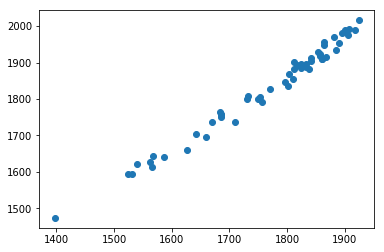

In [22]:
plt.plot(composers.birth, composers.death, 'o')
plt.show()

Now we look at the default Pandas output. Different types of plots are accessible when using the ```data_frame.plot``` function via the ```kind``` option. The variables to plot are column names passed as keywords instead of whole series like in Matplotlib:

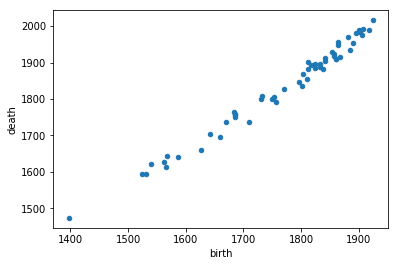

In [23]:
composers.plot(x = 'birth', y = 'death', kind = 'scatter')
# MZ: in this way you directly have the labels
plt.show()

We see that the plot automatically gets axis labels. Another gain is that some obvious options like setting a title are directly accesible when creating the plot:

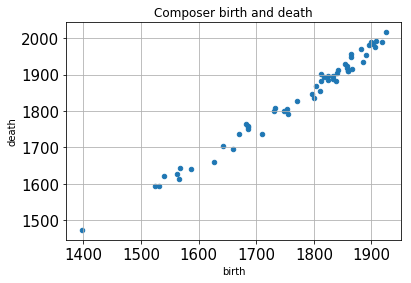

In [24]:
composers.plot(x = 'birth', y = 'death', kind = 'scatter',
               title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

One can add even more information on the plot by using more arguments used in a similar way as a grammar of graphics. For example we can color the scatter plot by periods:

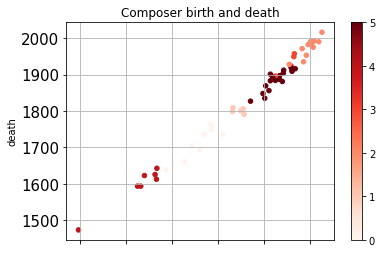

In [25]:
composers.plot(x = 'birth', y = 'death',kind = 'scatter',
               c = composers.period.astype('category').cat.codes, colormap = 'Reds', title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

Here you see already a limitation of the plotting library. To color dots by the peiod category, we had to turn the latter into a series of numbers. We could then rename those to improve the plot, but it's better to use more specialized packages such as Seaborn which allow to realize this kind of plot easily:

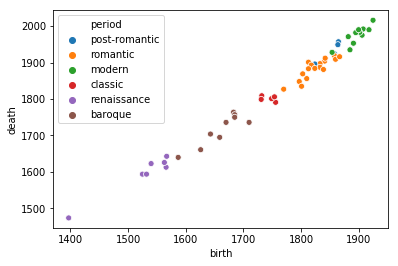

In [26]:
sns.scatterplot(data = composers, x = 'birth', y = 'death', hue = 'period') # MZ: 'hue' to get the colors with the dots
plt.show()

Some additional plotting options are available in the ```plot()``` module. For example histograms:

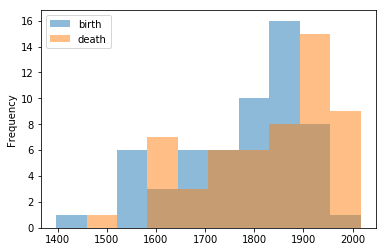

In [27]:
composers.plot.hist(alpha = 0.5)
plt.show()

Here you see again the gain from using Pandas: without specifying anything, Pandas made a histogram of the two columns containing numbers, labelled the axis and even added a legend to the plot.

All these features are very nice and very helpful when exploring a dataset. When anaylzing data in depth and creating complex plots, Pandas's plotting might however be limiting and other options such as Seaborn or Plotnine can be used.

Finally, all plots can be "styled" down to the smallest detail, either by using Matplotlib options or by directly applying a style e.g.:

In [28]:
plt.style.use('ggplot')

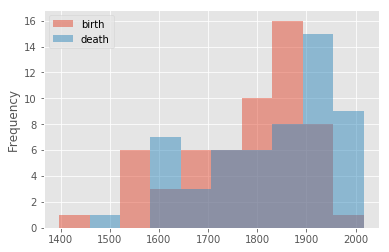

In [29]:
composers.plot.hist(alpha = 0.5)
plt.show()